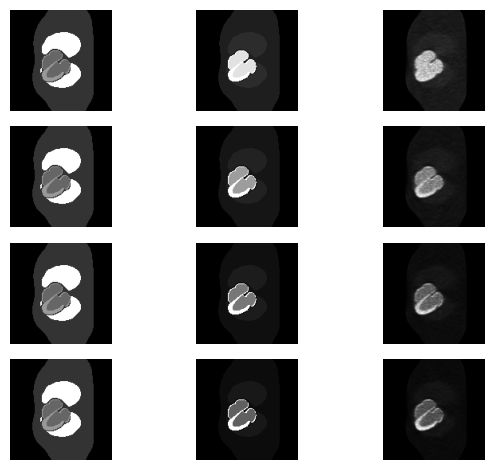

In [69]:
import nibabel as nib
import matplotlib.pyplot as plt
import os
import numpy as np

path = '/home/jfowler/projects/dynamicPET/'

slice_num = 25
frames = 4
sim = []
PBPK = []

# Simulation Ouput
for frame in range(1, frames+1):
    filename = f'Output/output_images_frame{frame}_recon_it6_subset5.nii'
    filepath = os.path.join(path, filename)

    img = nib.load(filepath)
    data = img.get_fdata()
    slice = data[:, :, slice_num]
    sim.append(slice)

    filename = f'Input/input_images_frame{frame}.nii'
    filepath = os.path.join(path, filename)

    img = nib.load(filepath)
    data = img.get_fdata()
    slice = data[:, :, slice_num]
    PBPK.append(slice)

# ROI
imgname = 'Input/NCAT_128x128x47_0347x0347x0327_regions.nii'
imgpath = os.path.join(path, imgname)
img = nib.load(imgpath)
data = img.get_fdata()
ROI = data[:, :, slice_num]

# Plot all frames
for i in range(frames):

    plt.subplot(frames, 3, 3*i+3)
    plt.imshow(sim[i], cmap="gray")
    plt.axis('off')

    plt.subplot(frames, 3, 3*i+2)
    plt.imshow(PBPK[i], cmap="gray")
    plt.axis('off')

    plt.subplot(frames, 3, 3*i+1)
    plt.imshow(ROI, cmap="gray")
    plt.axis('off')

plt.tight_layout()
plt.show()